In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [105]:
path = '/home/qsimexpcontrol/LabRAD/data/PMT Counts.dir/'
data = np.loadtxt(path + '01431 - PMT Counts.csv', delimiter=',')

In [106]:
t, high, low, diff = data[:,0],data[:,1], data[:,2], data[:,3] 


<IPython.core.display.Javascript object>


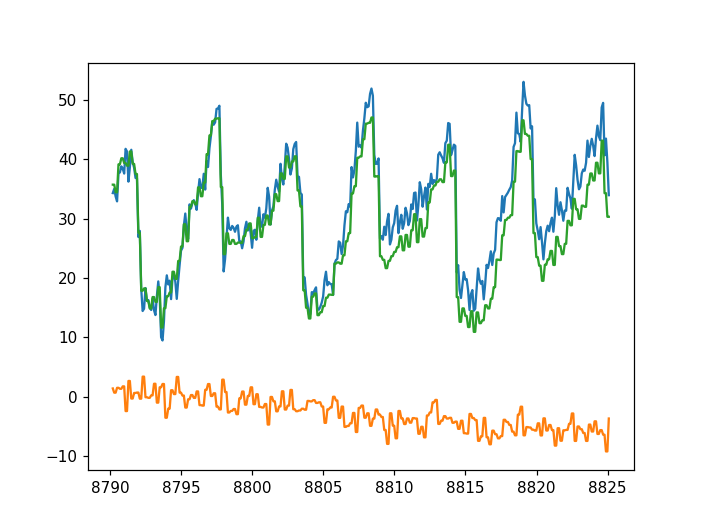

In [107]:
%matplotlib notebook
tStart = 87550
tStop = 87900
plt.plot(t[tStart:tStop], diff[tStart:tStop])
plt.plot(t[tStart:tStop], low[tStart:tStop] - 170)
plt.plot(t[tStart:tStop], high[tStart:tStop] - 170.)
plt.show()


In [80]:
path = '/home/qsimexpcontrol/LabRAD/data/PMT Counts.dir/'
data = np.loadtxt(path + '01431 - PMT Counts.csv', delimiter=',')

In [81]:
t, high, low, diff = data[:,0],data[:,1], data[:,2], data[:,3] 

<IPython.core.display.Javascript object>


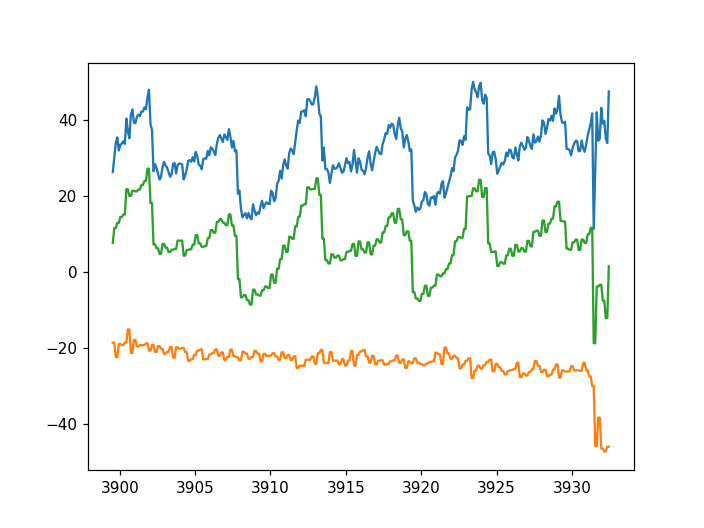

In [89]:
%matplotlib notebook
tStart = 38890
tStop = 39220
plt.plot(t[tStart:tStop], diff[tStart:tStop])
plt.plot(t[tStart:tStop], low[tStart:tStop] - 170.)
plt.plot(t[tStart:tStop], high[tStart:tStop] - 170.)
plt.show()

In [95]:
path = '/home/qsimexpcontrol/LabRAD/data/PMT Counts.dir/'
data = np.loadtxt(path + '01438 - PMT Counts.csv', delimiter=',')

In [96]:
t, high, low, diff = data[:,0],data[:,1], data[:,2], data[:,3] 

3.16411111111


<IPython.core.display.Javascript object>


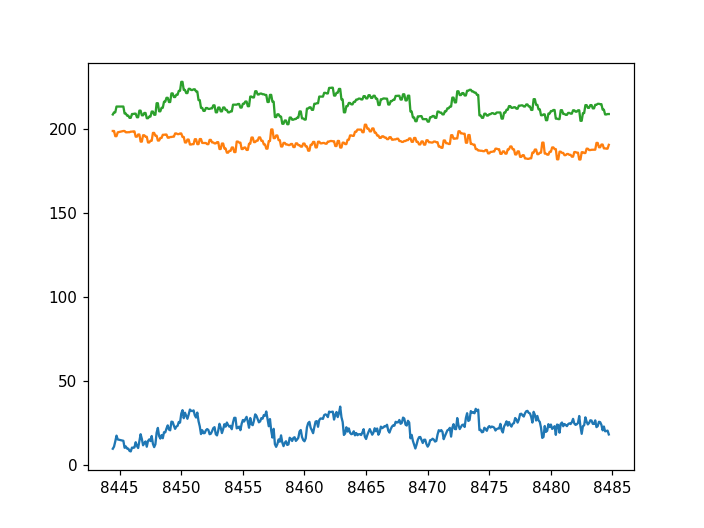

In [104]:
print len(t)/10./60/60
%matplotlib notebook
tStart = 84200
tStop = 84600
plt.plot(t[tStart:tStop], diff[tStart:tStop])
plt.plot(t[tStart:tStop], low[tStart:tStop])
plt.plot(t[tStart:tStop], high[tStart:tStop])
plt.show()